# DA Mini Project_정소연
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

## 0. 요구사항 분석

* 누가 서비스 구독을 **연장**할지 예측하기 위한 사전파악이 목표  
→ 누가 다음달에도 돈을 낼까?  
→ 누가 이 서비스에 만족 했을까?  
→ 만족한 사람들은 서비스의 어떤 부분을 제일 좋아했을까?  
→ 이전 결제자들의 패턴은 무엇인가?  

→→ Bottom to Up 방식으로 알아보자

## 1. 데이터 탐색 및 전처리

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [92]:
df = pd.read_csv('proj_data/mini.csv', sep=',')

In [95]:
df.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [93]:
df.info()
#null값 없음
#불필요한 컬럼 = user_id
#dtype 바꿔줘야하는 컬럼 = preferred_difficulty_level , subscription_type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [94]:
df.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


* 서비스에 가입한 기간 = 평균 12개월, 최소 1개월, 최대 23개월
* 일반적인 로그인 시간 = 평균 15시간, 최소 2.3시간, 최대 27시간(?)
* 학습 세션에 소요된 평균 시간 = 평균 55분, 최소 0분, 최대 503분
* 월간 활동 학습 일수 = 평균 12.5일, 최소 1일, 최대 24일
* 완료한 총 코스 수 = 평균 12.2개, 최소 1개, 최대 27개
* 중단된 학습 세션 수 = 평균 3개, 최소 0개, 최대 12개

In [96]:
#object 타입 이상치 확인
print(df['preferred_difficulty_level'].unique())
print(df['subscription_type'].unique())

['Low' 'Medium' 'High']
['Basic' 'Premium']


In [97]:
#user_id 삭제
df.drop(['user_id'],axis=1,inplace=True)

In [98]:
#object -> int 변환
df['preferred_difficulty_level'] = df['preferred_difficulty_level'].map({'Low':0, 'Medium':1,'High':2})
df['subscription_type'] = df['subscription_type'].map({'Basic':0, 'Premium':1})

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   subscription_duration              10000 non-null  int64  
 1   recent_login_time                  10000 non-null  int64  
 2   average_login_time                 10000 non-null  float64
 3   average_time_per_learning_session  10000 non-null  float64
 4   monthly_active_learning_days       10000 non-null  int64  
 5   total_completed_courses            10000 non-null  int64  
 6   recent_learning_achievement        10000 non-null  float64
 7   abandoned_learning_sessions        10000 non-null  int64  
 8   community_engagement_level         10000 non-null  int64  
 9   preferred_difficulty_level         10000 non-null  int64  
 10  subscription_type                  10000 non-null  int64  
 11  customer_inquiry_history           10000 non-null  int6

In [151]:
df

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,0,0,4,5,0
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,1,0,1,6,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,1,1,0,7,1
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,0,0,1,0,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,0,1,1,1,1
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,1,0,2,7,1
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,2,0,1,6,1
9998,11,7,18.783800,5.297234,10,10,89.885656,4,5,0,0,2,0,1


In [163]:
#컬럼명 변경하기
columns = ['가입기간(월)', '마지막로그인(일)', '평균접속시간', '평균학습시간(분)', '월간활동학습일', '총완료코스', '학습성취도', '중단세션수', '커뮤참여도', '선호난이도', '구독유형', '고객문의이력', '결제패턴', '연장여부']

df.columns = columns
df

,가입기간(월),마지막로그인(일),평균접속시간,평균학습시간(분),월간활동학습일,총완료코스,학습성취도,중단세션수,커뮤참여도,선호난이도,구독유형,고객문의이력,결제패턴,연장여부
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,0,0,4,5,0
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,1,0,1,6,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,1,1,0,7,1
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,0,0,1,0,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,0,1,1,1,1
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,1,0,2,7,1
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,2,0,1,6,1
9998,11,7,18.783800,5.297234,10,10,89.885656,4,5,0,0,2,0,1


## 2. 이전 결제자들의 '의미있는' 패턴은 무엇인가?  

### 2.1 가설1
결제패턴과 가입기간 또는 월간활동학습일 사이에는 의미있는 관계가 있을 것이다.

In [164]:
# '결제패턴' 기준으로 데이터프레임을 나누기
dfs = {}

for i in range(8):
    pattern_name = f'df{i}'
    pattern_data = df[df['결제패턴'] == i]
    dfs[pattern_name] = pattern_data

In [165]:
dfs['df0'].describe()

,가입기간(월),마지막로그인(일),평균접속시간,평균학습시간(분),월간활동학습일,총완료코스,학습성취도,중단세션수,커뮤참여도,선호난이도,구독유형,고객문의이력,결제패턴,연장여부
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.0,1275.000000
mean,11.933333,14.888627,14.925603,52.193572,12.747451,12.236863,74.885876,2.934902,3.878431,0.683922,0.401569,1.995294,0.0,0.632941
std,6.544218,8.388721,2.945126,52.205352,6.989153,3.616688,9.704475,1.711444,1.274726,0.770135,0.490408,1.400822,0.0,0.482192
min,1.000000,1.000000,3.483285,0.011515,1.000000,2.000000,44.359112,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,6.000000,7.000000,13.057418,14.251382,7.000000,10.000000,68.012606,2.000000,3.000000,0.000000,0.000000,1.000000,0.0,0.000000
50%,12.000000,15.000000,14.973445,36.349996,13.000000,12.000000,75.159276,3.000000,4.000000,0.000000,0.000000,2.000000,0.0,1.000000
75%,18.000000,22.000000,16.904095,74.172768,19.000000,15.000000,81.427048,4.000000,5.000000,1.000000,1.000000,3.000000,0.0,1.000000
max,23.000000,29.000000,26.284396,430.850260,24.000000,25.000000,106.385512,10.000000,5.000000,2.000000,1.000000,7.000000,0.0,1.000000


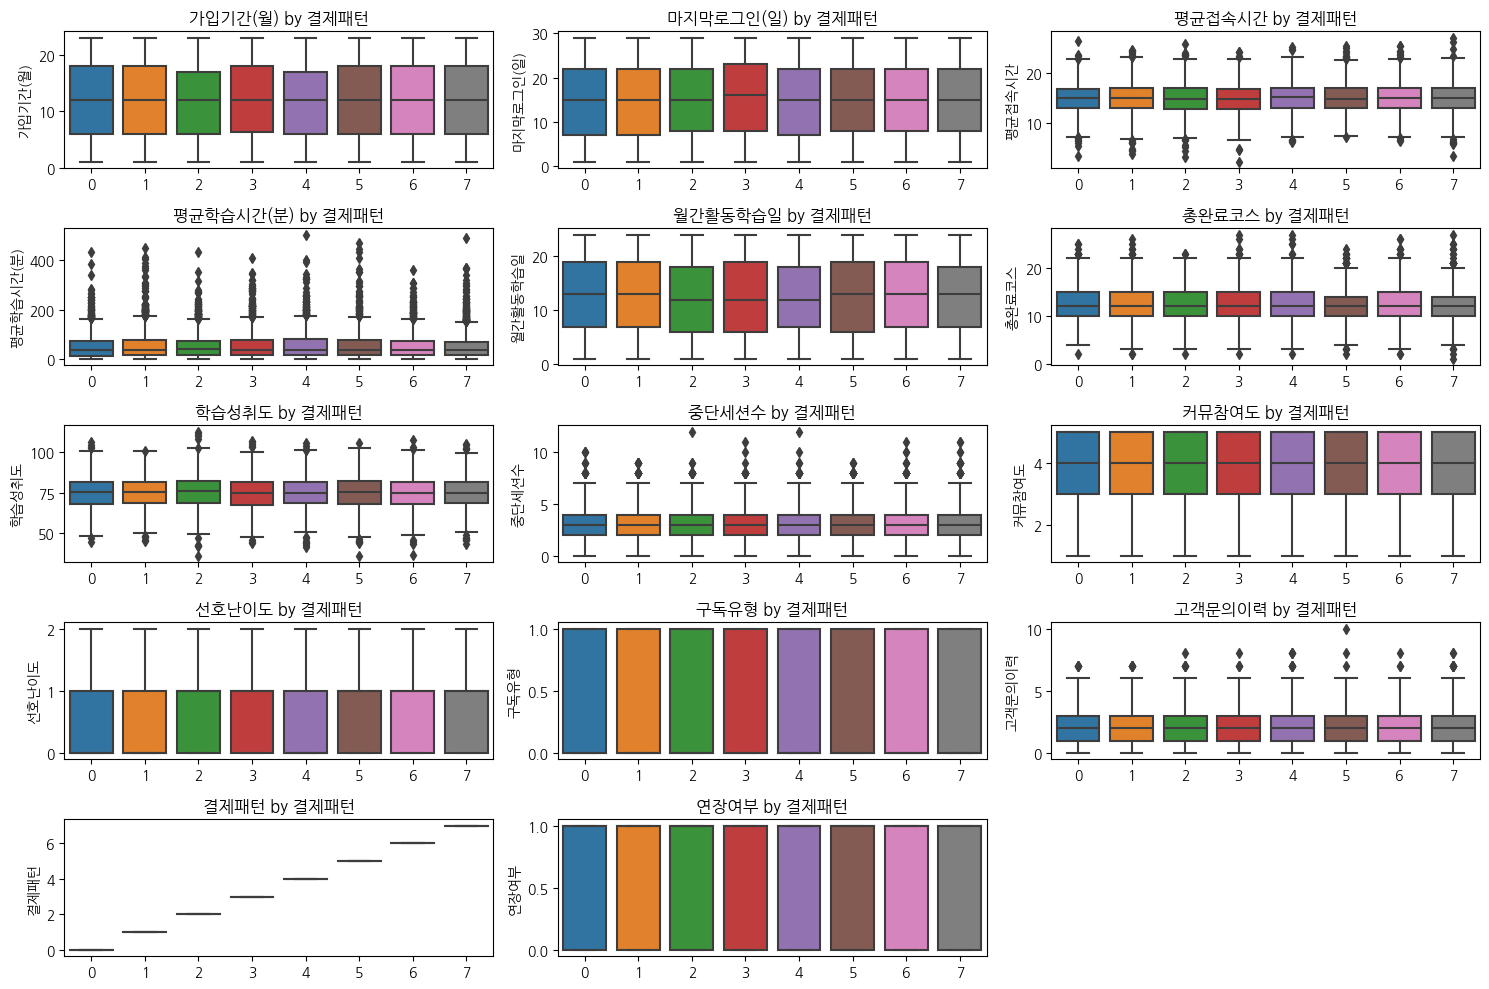

In [166]:
#'결제패턴'별 boxplot 확인하기
feature = df.columns
plt.figure(figsize=(15, 10))

for i in range(len(feature)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x='결제패턴', y=feature[i], data=df)
    plt.title(f'{feature[i]} by 결제패턴')
    plt.xlabel('')
    plt.ylabel(feature[i])

plt.tight_layout() 
plt.show()

In [167]:
df.sort_values(by='가입기간(월)')

,가입기간(월),마지막로그인(일),평균접속시간,평균학습시간(분),월간활동학습일,총완료코스,학습성취도,중단세션수,커뮤참여도,선호난이도,구독유형,고객문의이력,결제패턴,연장여부
5154,1,4,12.576384,74.197458,13,13,69.228757,4,3,0,0,3,0,1
329,1,10,14.760228,47.336311,5,11,79.825145,3,5,0,1,2,2,1
3155,1,26,11.440963,78.979392,15,18,71.585011,3,5,1,0,1,5,1
7927,1,29,16.750604,14.292538,4,14,76.128158,3,5,1,1,6,3,1
1136,1,2,17.167461,22.868219,3,7,54.863854,3,4,2,0,2,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7907,23,7,14.674501,19.959455,16,8,74.758318,2,1,1,0,3,2,0
9621,23,2,17.461238,40.404709,9,13,69.116019,6,4,0,0,3,1,1
6362,23,13,12.695512,9.469342,23,13,73.583897,3,1,2,0,2,7,1
751,23,28,20.025993,110.902413,13,14,62.686838,1,5,0,0,1,7,1


### 2.1 가설1 결론
결제 패턴에 따른 박스 플롯 그래프에서 특별한 형태가 나타나지 않았으므로, 다음달 구독 여부에는 결제 패턴이 크게 영향을 미치지 않음을 알 수 있다. 또한 가입기간이 23개월인 5063번 사용자의 결제 패턴 값이 1인 것으로 보아 구독 유지와 결제 패턴은 크게 관련이 없는 것으로 추측된다.

### 2.2 가설2
가입기간에 따라 의미있는 학습 패턴이 있을 것이다.

In [169]:
#가입기간 대비 총완료코스 비율을 알아보자
df['가입기간_대비_완료코스'] = df['총완료코스']/df['가입기간(월)']
df

,가입기간(월),마지막로그인(일),평균접속시간,평균학습시간(분),월간활동학습일,총완료코스,학습성취도,중단세션수,커뮤참여도,선호난이도,구독유형,고객문의이력,결제패턴,연장여부,가입기간_대비_완료코스
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,0,0,4,5,0,1.230769
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,1,0,1,6,1,0.812500
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,1,1,0,7,1,0.636364
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,0,0,1,0,1,18.000000
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,1,0,3,0,1,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,0,1,1,1,1,0.727273
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,1,0,2,7,1,0.800000
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,2,0,1,6,1,2.000000
9998,11,7,18.783800,5.297234,10,10,89.885656,4,5,0,0,2,0,1,0.909091


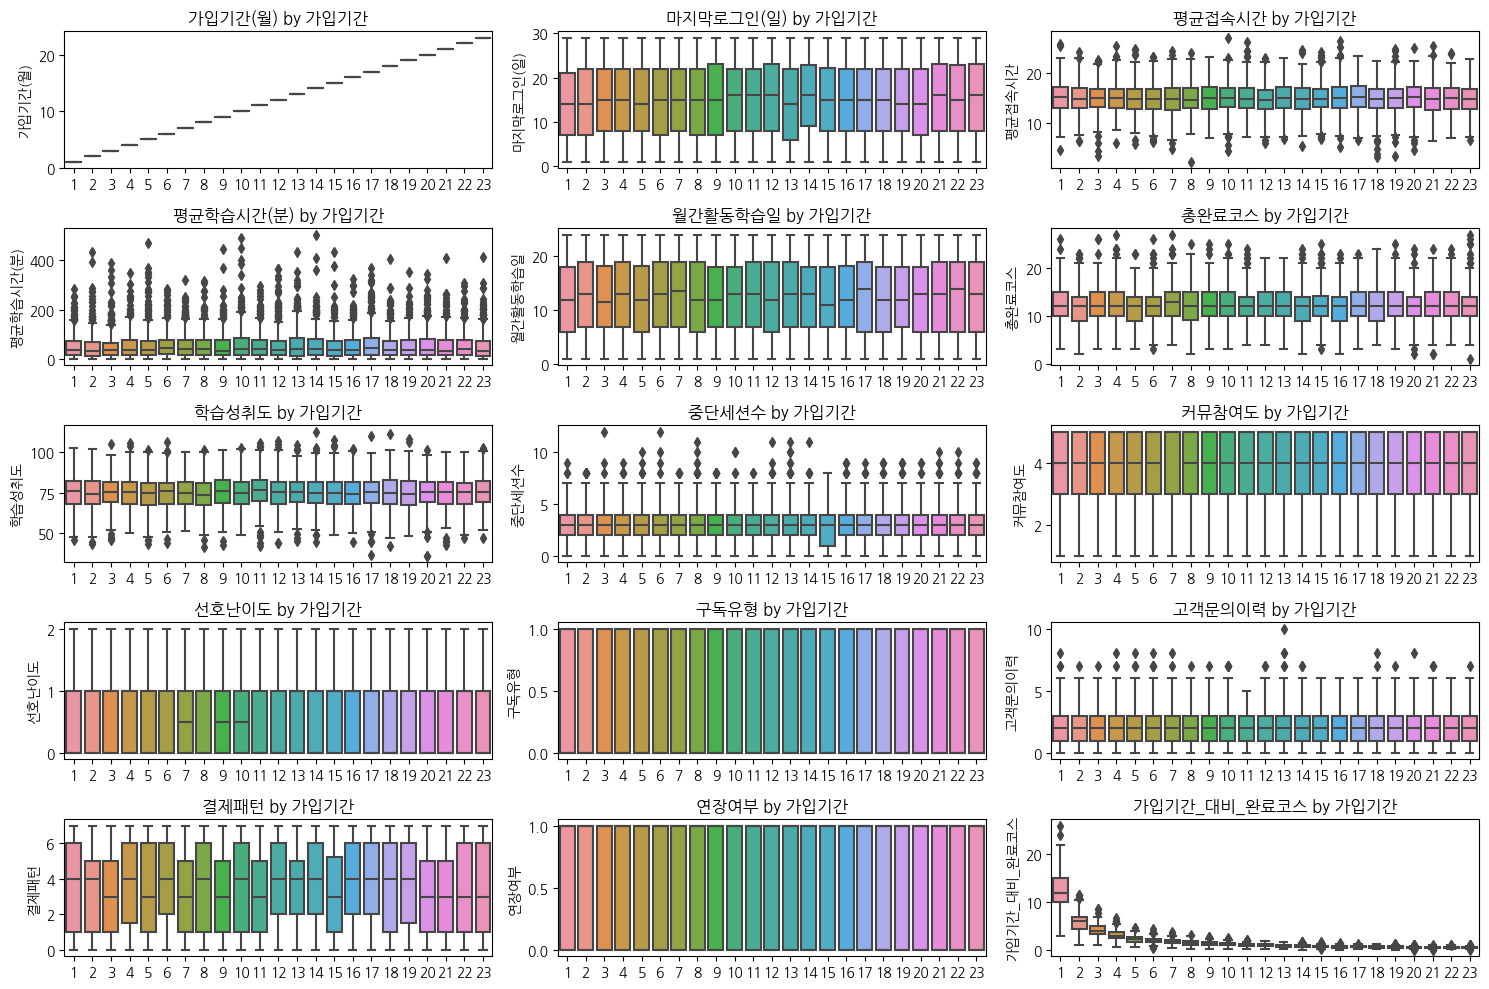

In [175]:
#'가입기간(월)'별 boxplot 확인하기
feature = df.columns
plt.figure(figsize=(15, 10))

for i in range(len(feature)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x='가입기간(월)', y=feature[i], data=df)
    plt.title(f'{feature[i]} by 가입기간')
    plt.xlabel('')
    plt.ylabel(feature[i])

plt.tight_layout() 
plt.show()

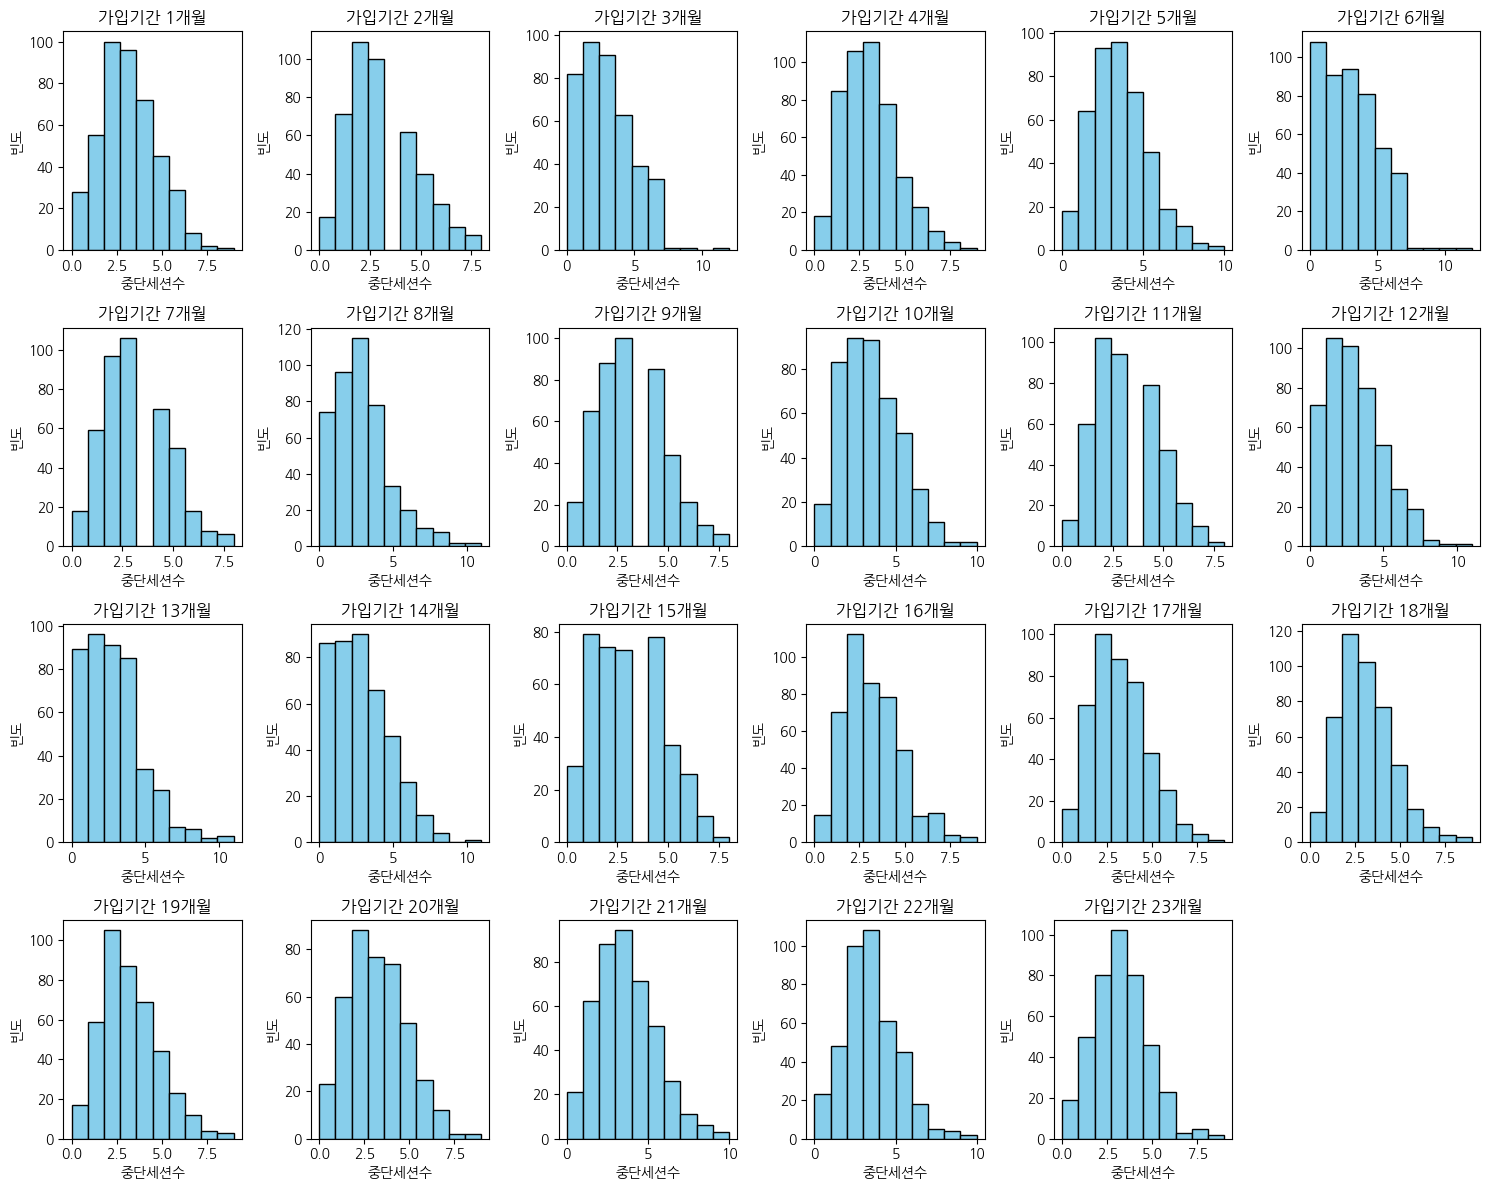

In [184]:
#가입기간별 중단세션 수
plt.figure(figsize=(15, 12))

for i in range(1, 24):
    plt.subplot(4, 6, i)
    plt.hist(df[df['가입기간(월)'] == i]['중단세션수'], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'가입기간 {i}개월')
    plt.xlabel('중단세션수')
    plt.ylabel('빈도')

plt.tight_layout()
plt.show()

**→→ 가입기간이 3, 6, 8, 12, 13, 14개월인 사용자들이 중단 세션 수가 가장 적었다.  
이후로는 비슷한 분포를 보이게 되는데 가입 기간에 따른 결제 패턴도 확인해보자.  
→→ 중단 세션 수가 적다는 것은 강의에 만족한 것으로 간주해도 될까?**

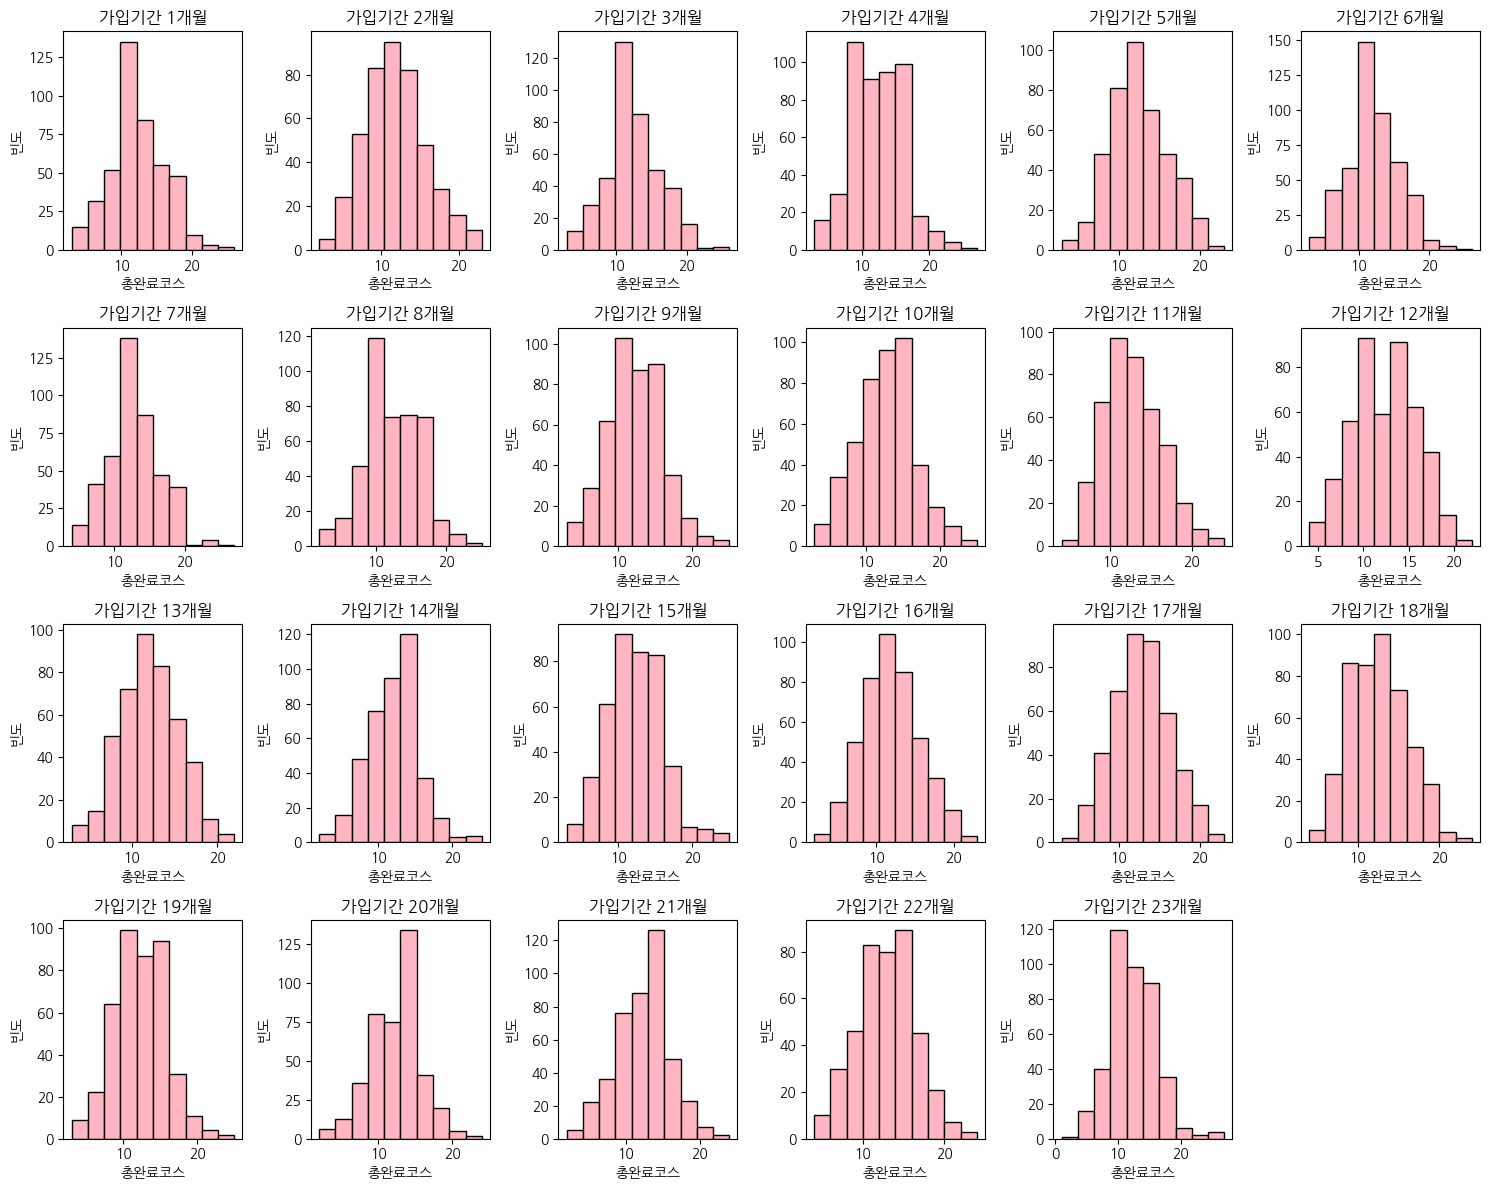

In [188]:
#가입기간별 총완료코스 분포
plt.figure(figsize=(15, 12))

for i in range(1, 24):
    plt.subplot(4, 6, i)
    plt.hist(df[df['가입기간(월)'] == i]['총완료코스'], bins=10, color='lightpink', edgecolor='black')
    plt.title(f'가입기간 {i}개월')
    plt.xlabel('총완료코스')
    plt.ylabel('빈도')

plt.tight_layout()
plt.show()

**→→ 가입기간 12개월 내외에서 완료코스율이 증가했다고 볼 수 있을까?**

### 2.2 가설2 결론
가입기간이 12개월 내외인 경우 학습 세션 중단을 적게 하는 것으로 추측된다. 중단을 하지 않았다는 것은 만족 했다는 것으로 간주한다.

# 결론
* 가입 기간이 길어질수록 서비스에 만족할 확률이 높아진다.
* 단, 1년 이상 가입한 이용자들은 매일 똑같은 내용으로 학습 세션 중단수가 초기 사용자와 비슷해지므로 점점 반복적인 콘텐츠에 피로도가 쌓였을 것으로 추측할 수 있다.
* 따라서 8개월 이상 사용자들이 다음달에도 연장해서 구독할 확률이 클 것이다.